<a href="https://colab.research.google.com/github/i-rybachok/RybachokMachineLearning/blob/main/%D0%9C%D0%9D_%D0%9B%D0%B0%D0%B14_%D0%A0%D0%B8%D0%B1%D0%B0%D1%87%D0%BE%D0%BA_%D0%A4%D0%86%D0%A24_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Рибачок Ірина, ФІТ 4-8. На парі була присутня

In [ ]:
!pip install category_encoders

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import PowerTransformer
from scipy.stats import zscore

import category_encoders as ce

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error



In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hellbuoy/car-price-prediction")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'car-price-prediction' dataset.
Path to dataset files: /kaggle/input/car-price-prediction


In [ ]:
df = pd.read_csv(os.path.join(path, "CarPrice_Assignment.csv"))
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
df['fueltype'].value_counts()

,count
fueltype,
gas,185
diesel,20


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.drop(['car_ID'], axis = 1, inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df.skew(numeric_only=True)

,0
symboling,0.211072
wheelbase,1.050214
carlength,0.155954
carwidth,0.904003
carheight,0.063123
curbweight,0.681398
enginesize,1.947655
boreratio,0.020156
stroke,-0.689705
compressionratio,2.610862


Висновок: деякі ознаки має асиметричний розподіл (|skew| >= 1). Наприклад, enginesize	= 1.947655 - це ознака з правосторонньою (позитивною) асиметрією

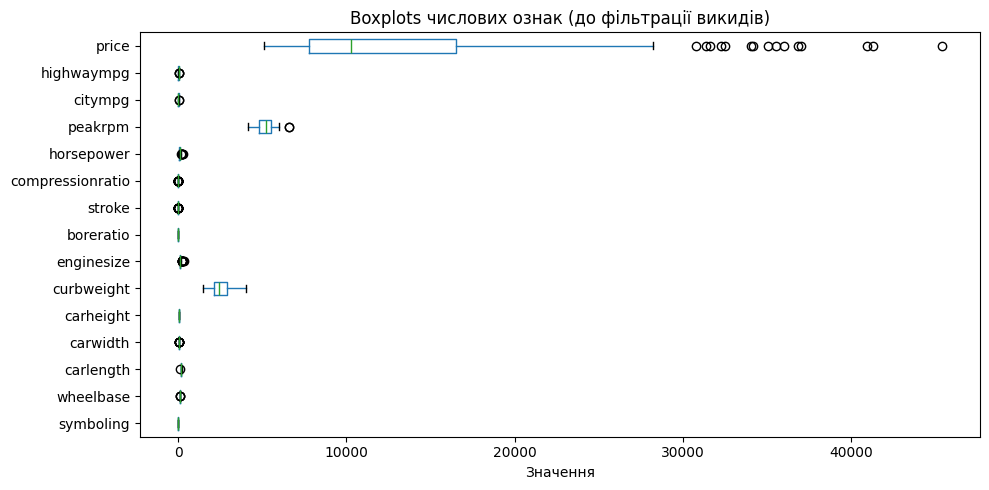

In [ ]:
df_raw = df.copy()

num_cols = df_raw.select_dtypes(include=['number']).columns

plt.figure(figsize=(10, 5))
df_raw[num_cols].boxplot(vert=False, grid=False)
plt.title('Boxplots числових ознак (до фільтрації викидів)')
plt.xlabel('Значення')
plt.tight_layout()
plt.show()

За графіком boxplot видно, що є викиди

In [ ]:
# Обчислюємо Z-оцінки для всіх числових стовпців
z_scores = zscore(df.select_dtypes(include=['float64', 'int64']))

# Створюємо маску: True для всіх рядків, де Z-score < 3 у всіх стовпцях
mask = (abs(z_scores) < 3).all(axis=1)

# Фільтруємо датафрейм
df = df[mask].copy()

print(f"Було рядків: {len(df)}, після видалення викидів: {len(df)}")

Було рядків: 157, після видалення викидів: 157


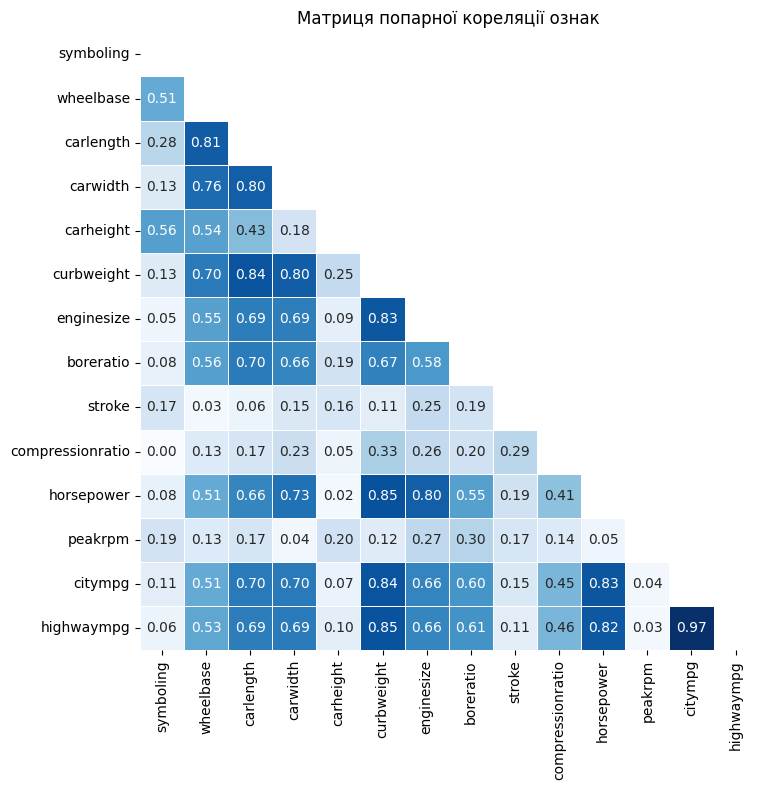

In [ ]:
# Розрахунок матриці кореляцій (без стовпця 'price')
mtx = df.drop('price', axis=1).corr(numeric_only=True).abs()

# Побудова графіка
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(
    mtx,
    cmap='Blues',
    annot=True,
    fmt=".2f",
    linewidths=.5,
    mask=np.triu(np.ones_like(mtx, dtype=bool)),  # маскуємо верхню трикутну частину
    square=True,
    cbar=False,
    ax=ax
)

plt.title("Матриця попарної кореляції ознак")
plt.tight_layout()
plt.show()

Висновок: деякі ознаки мають щільну мультикореляцію

Видаляємо ознаки, що мають кореляцію більше ніж 0,85

In [ ]:
corr_price = df.corr(numeric_only=True)['price'].abs().sort_values(ascending=False)
corr_price

,price
price,1.000000
curbweight,0.838730
horsepower,0.824452
citympg,0.790256
highwaympg,0.772272
carwidth,0.743072
carlength,0.712051
enginesize,0.706024
wheelbase,0.632687
boreratio,0.592965


In [ ]:
to_drop = {'highwaympg', 'wheelbase', 'carlength', 'enginesize'}

present = list(to_drop & set(df.columns))
df1 = df.drop(columns=present).copy()

print("Видалено:", present)
print("Кількість ознак до/після:", df.shape[1], "→", df1.shape[1])

Видалено: ['wheelbase', 'carlength', 'highwaympg', 'enginesize']
Кількість ознак до/після: 25 → 21


In [ ]:
df1.select_dtypes(include='object').nunique()

,0
CarName,114
fueltype,1
aspiration,2
doornumber,2
carbody,5
drivewheel,3
enginelocation,1
enginetype,6
cylindernumber,4
fuelsystem,7


In [ ]:
X = df1.drop(columns=["price"], axis=1)
y = df1["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
cat_cols = X_train.select_dtypes(include='object').columns
cat_cols

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [ ]:
encoder = ce.TargetEncoder(cols=cat_cols)

In [ ]:
X_train = encoder.fit_transform(X_train, y_train)
X_test = encoder.transform(X_test)

In [ ]:
power_transform = PowerTransformer().set_output(transform='pandas')

X_train = power_transform.fit_transform(X_train)
X_test = power_transform.transform(X_test)

In [ ]:
X_train.skew()

,0
symboling,-0.053996
CarName,0.000000
fueltype,0.000000
aspiration,0.000000
doornumber,-0.146134
carbody,0.022403
drivewheel,0.000000
enginelocation,0.000000
carwidth,0.000000
carheight,0.010448


In [ ]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'SVR': SVR()
}

print("Побудовані моделі:", ", ".join(models.keys()))

Побудовані моделі: LinearRegression, Ridge, Lasso, RandomForestRegressor, GradientBoostingRegressor, SVR


In [ ]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = model.score(X_train, y_train)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    results[name] = {
        "model": model,
        "y_pred": y_pred,
        "R²": r2,
        "MAE": mae,
        "MSE": mse
    }

    print(f"[{name}] R²: {r2:.3f} | MAE: {mae:.3f} | MSE: {mse:.3f}")

[LinearRegression] R²: 0.823 | MAE: 1757.788 | MSE: 5180029.369
[Ridge] R²: 0.823 | MAE: 1765.395 | MSE: 5220937.679
[Lasso] R²: 0.823 | MAE: 1758.584 | MSE: 5187796.157
[RandomForestRegressor] R²: 0.984 | MAE: 1655.269 | MSE: 5259959.799
[GradientBoostingRegressor] R²: 0.994 | MAE: 1743.840 | MSE: 5796786.893
[SVR] R²: -0.126 | MAE: 2955.993 | MSE: 18277565.179


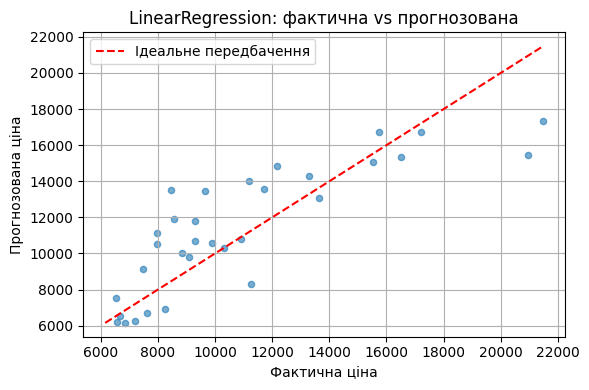

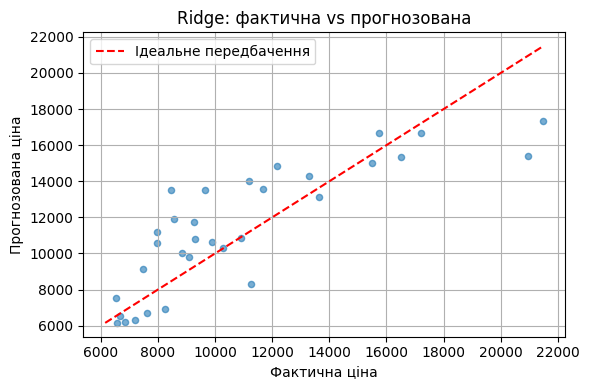

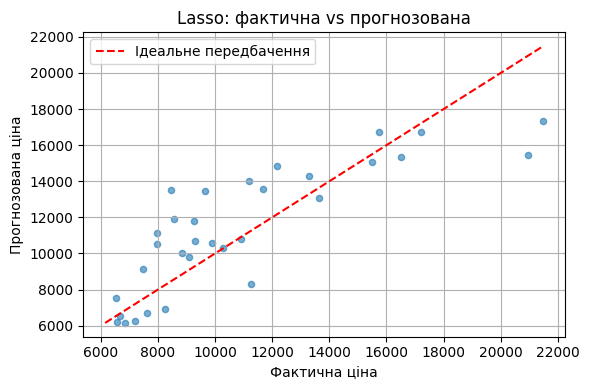

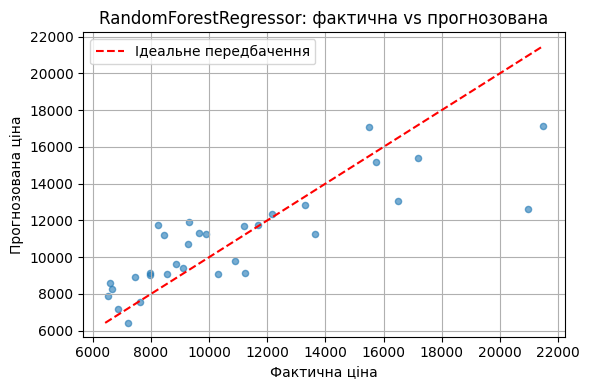

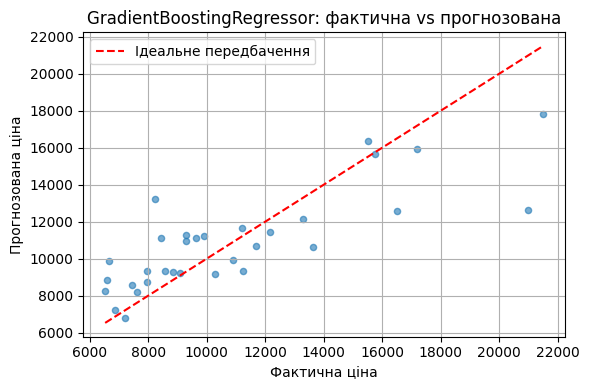

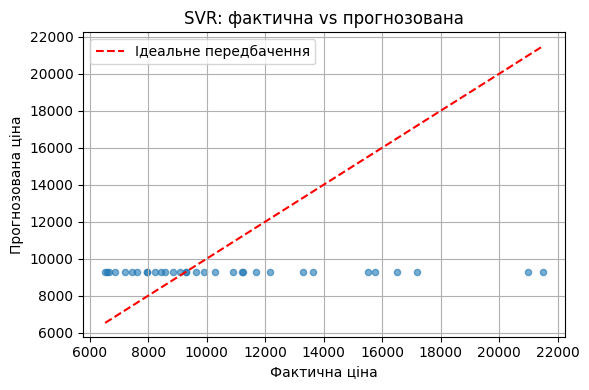

In [ ]:
y_true = np.asarray(y_test)
for name, res in results.items():
    y_pred = np.asarray(res["y_pred"]).ravel()
    lo = min(y_true.min(), y_pred.min())
    hi = max(y_true.max(), y_pred.max())

    plt.figure(figsize=(6, 4))
    plt.scatter(y_true, y_pred, s=20, alpha=0.6)
    plt.plot([lo, hi], [lo, hi], 'r--', label='Ідеальне передбачення')
    plt.xlabel("Фактична ціна")
    plt.ylabel("Прогнозована ціна")
    plt.title(f"{name}: фактична vs прогнозована")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
rf_key = 'RandomForestRegressor' if 'RandomForestRegressor' in results else 'RandomForest'
y_rf = np.asarray(results[rf_key]["y_pred"]).ravel()

# Колонка ідентифікатора: беремо 'car_ID', якщо є, інакше — індекс тесту
if 'car_ID' in X_test.columns:
    id_name = 'car_ID'
    id_series = X_test['car_ID']
else:
    id_name = 'row_id'
    id_series = pd.Series(y_test.index, index=y_test.index)

df_rf = pd.DataFrame({
    id_name: id_series,
    'Actual': y_test,
    'Predicted_RF': y_rf
})

sample_rf = df_rf.sample(n=min(10, len(df_rf)), random_state=42).reset_index(drop=True)
print(sample_rf.to_string(index=False))

 row_id  Actual  Predicted_RF
    135 15510.0      17082.72
     39  8845.0       9643.15
     40 10295.0       9060.74
    146  7463.0       8899.18
    130  9295.0      11914.00
    183  7975.0       9126.36
    197 16515.0      13038.48
    104 17199.0      15370.98
     23  7957.0       9013.64
    168  9639.0      11313.94
